In [27]:
import wbdata
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime


In [28]:
url = 'https://www.worldometers.info/coronavirus/'
requests.get(url)
wdweb = requests.get(url)

In [29]:
wdweb

<Response [200]>

In [30]:
wdwebsoup = BeautifulSoup(wdweb.text, 'lxml')

In [31]:
wdwebtable_data = wdwebsoup.find('table', id = 'main_table_countries_yesterday')

In [32]:
headers = []
for i in wdwebtable_data.find_all('th'):
    title = i.text
    headers.append(title)

In [33]:
covid = pd.DataFrame(columns = headers)

In [34]:
for j in wdwebtable_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [td.text for td in row_data]
        length = len(covid)
        covid.loc[length] = row

In [35]:
covid.columns = ['ID','country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecov','NewRecov','ActiveCases','SeriousCritical','TotalCases1M','TotalDeaths1M','TotalTests','TotalTests1M','Population','Continent','1CaseEvery','1DeathEvery','1TestEvery']
covid.set_index('country', inplace=True, drop=True)

In [36]:
c

,ID,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecov,NewRecov,ActiveCases,SeriousCritical,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,1DeathEvery,1TestEvery
country,,,,,,,,,,,,,,,,,,
\nAsia\n,,"12,688,476","+91,136","227,023","+1,510","11,088,911","+91,964","1,372,542","20,937",,,,,,Asia,\n,,
\nNorth America\n,,"10,209,924","+72,084","336,567","+1,209","6,796,747","+51,924","3,076,610","19,212",,,,,,North America,\n,,
\nSouth America\n,,"9,096,117","+54,644","282,065","+1,361","8,059,660","+81,512","754,392","17,460",,,,,,South America,\n,,
\nEurope\n,,"7,320,148","+155,529","241,934","+1,791","3,266,032","+36,047","3,812,182","17,449",,,,,,Europe,\n,,
\nAfrica\n,,"1,674,836","+9,776","40,289",+298,"1,376,599","+9,448","257,948","1,932",,,,,,Africa,\n,,


In [42]:
covid.shape

(233, 18)

In [54]:
covid[covid.index == '\nAsia\n']

,ID,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecov,NewRecov,ActiveCases,SeriousCritical,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,1DeathEvery,1TestEvery
country,,,,,,,,,,,,,,,,,,
\nAsia\n,,"12,688,476","+91,136","227,023","+1,510","11,088,911","+91,964","1,372,542","20,937",,,,,,Asia,\n,,


In [52]:
covid[covid.index == 'China']

,ID,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecov,NewRecov,ActiveCases,SeriousCritical,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,1DeathEvery,1TestEvery
country,,,,,,,,,,,,,,,,,,
China,1,"85,704",+19,"4,634",,"80,812",+10,258,4,60,3,"160,000,000","111,163","1,439,323,776",Asia,"16,794","310,601",9


In [62]:
covid.index


Index(['\nAsia\n', '\nNorth America\n', '\nSouth America\n', '\nEurope\n',
       '\nAfrica\n', '\nOceania\n', '\n\n', 'World', 'China', 'USA',
       ...
       'Solomon Islands', 'Wallis and Futuna', 'Total:', 'Total:', 'Total:',
       'Total:', 'Total:', 'Total:', 'Total:', 'Total:'],
      dtype='object', name='country', length=233)

In [63]:
covid.index=covid.index.str.replace("\n","")


In [64]:
covid.head()

,ID,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecov,NewRecov,ActiveCases,SeriousCritical,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,1DeathEvery,1TestEvery
country,,,,,,,,,,,,,,,,,,
Asia,,"12,688,476","+91,136","227,023","+1,510","11,088,911","+91,964","1,372,542","20,937",,,,,,Asia,\n,,
North America,,"10,209,924","+72,084","336,567","+1,209","6,796,747","+51,924","3,076,610","19,212",,,,,,North America,\n,,
South America,,"9,096,117","+54,644","282,065","+1,361","8,059,660","+81,512","754,392","17,460",,,,,,South America,\n,,
Europe,,"7,320,148","+155,529","241,934","+1,791","3,266,032","+36,047","3,812,182","17,449",,,,,,Europe,\n,,
Africa,,"1,674,836","+9,776","40,289",+298,"1,376,599","+9,448","257,948","1,932",,,,,,Africa,\n,,


In [65]:
data_date = datetime.datetime(2018, 12, 31), datetime.datetime(2018, 12, 31)
# countries = [i['id'] for i in wbdata.get_country(incomelevel='HIC')]
indicators = {"EG.ELC.ACCS.ZS":"AccessElectricity", "NY.GDP.MKTP.CD":"GDP", 
             "NY.GDP.PCAP.CD":"GDPperCap", "SH.XPD.CHEX.PC.CD":"HealthExpenseperCap", 
              "IT.NET.USER.ZS":"IndividUsingInternet", "SP.DYN.LE00.IN":"LifeExpect", 
              "SH.MED.PHYS.ZS":"DrsPer1k", "GB.XPD.RSDV.GD.ZS":"RDExpen", 
              "SH.HIV.INCD":"NewInfecHIV", "SP.DYN.TFRT.IN":"FertilityRate",
             "per_si_allsi.cov_pop_tot":"CovSocialInsurance", 
             "SP.URB.TOTL":"UrbanPopulation", "SP.URB.TOTL.IN.ZS":"UrbanPopulationPerc"}
wbdf = wbdata.get_dataframe(indicators, country="all", data_date=data_date)

In [66]:
wbdf.head()

,AccessElectricity,GDP,GDPperCap,HealthExpenseperCap,IndividUsingInternet,LifeExpect,DrsPer1k,RDExpen,NewInfecHIV,FertilityRate,CovSocialInsurance,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,
Arab World,89.286856,2.772025e+12,6603.351190,None,63.166728,71.806825,NaN,NaN,NaN,3.231091,NaN,2.473634e+08,58.925419
Caribbean small states,98.401602,7.345916e+10,9982.268089,None,NaN,73.637108,NaN,NaN,NaN,1.995134,NaN,3.767742e+06,51.199362
Central Europe and the Baltics,100.000000,1.637175e+12,15966.668337,None,75.982137,76.976845,NaN,1.203905,NaN,1.574420,NaN,6.391521e+07,62.333782
Early-demographic dividend,90.724652,1.163520e+13,3582.002227,None,33.849011,70.483191,NaN,NaN,NaN,2.485790,NaN,1.465917e+09,45.129601
East Asia & Pacific,97.986434,2.634698e+13,11316.760450,None,NaN,76.068336,NaN,2.511093,NaN,1.823004,NaN,1.374809e+09,59.051876


In [67]:
covidandwb_merged = pd.merge(covid,wbdf, on=["country"])

In [68]:
covidandwb_merged.head()

,ID,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecov,NewRecov,ActiveCases,SeriousCritical,TotalCases1M,...,HealthExpenseperCap,IndividUsingInternet,LifeExpect,DrsPer1k,RDExpen,NewInfecHIV,FertilityRate,CovSocialInsurance,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,
North America,,"10,209,924","+72,084","336,567","+1,209","6,796,747","+51,924","3,076,610","19,212",,...,None,88.498903,78.886891,NaN,2.739569,NaN,1.706032,NaN,2.989531e+08,82.173045
World,,"41,024,730","+383,200","1,128,848","+6,169","30,619,363","+270,914","9,276,519","77,015","5,263",...,None,NaN,72.563274,NaN,2.273640,1400000.0,2.414975,NaN,4.195080e+09,55.270426
China,1,"85,704",+19,"4,634",,"80,812",+10,258,4,60,...,None,NaN,76.704000,NaN,2.185680,NaN,1.690000,NaN,8.238276e+08,59.152000
India,3,"7,649,158","+54,422","115,950",+714,"6,792,550","+61,933","740,658","8,944","5,526",...,None,20.081300,69.416000,0.8571,0.649980,NaN,2.222000,NaN,4.602957e+08,34.030000
Brazil,4,"5,274,817","+23,690","154,888",+662,"4,721,593","+39,934","398,336","8,318","24,762",...,None,70.434283,75.672000,2.1643,NaN,NaN,1.730000,30.869548,1.813355e+08,86.569000


In [69]:
covidandwb_merged.shape

(170, 31)

In [348]:
covidandwb = covidandwb_merged

In [350]:
covidandwb = covidandwb.drop(["NewCases", "NewDeaths", "TotalRecov", "NewRecov", 
                              "ActiveCases", "SeriousCritical"], axis=1)
covidandwb = covidandwb.drop(["World"], axis=0)

In [352]:
covidandwb['TotalDeaths'].unique()

array(['4,634 ', '115,950 ', '154,888 ', '34,210 ', '27,100 ', '29,272 ',
       '33,885 ', '33,875 ', '86,338 ', '18,656 ', '13,702 ', '10,366 ',
       '36,705 ', '5,699 ', '9,955 ', '12,734 ', '6,687 ', '9,445 ',
       '5,217 ', '6,673 ', '5,786 ', '2,278 ', '6,814 ', '10,443 ',
       '9,794 ', '3,721 ', '5,996 ', '3,027 ', '12,404 ', '8,502 ',
       '765 ', '224 ', '2,585 ', '2,204 ', '714 ', '1,122 ', '1,796 ',
       '5,923 ', '2,213 ', '3,546 ', '1,222 ', '1,676 ', '1,371 ',
       '2,576 ', '937 ', '2,022 ', '305 ', '1,617 ', '914 ', '1,101 ',
       '531 ', '534 ', '1,125 ', '28 ', '1,231 ', '1,873 ', '1,865 ',
       '746 ', '1,211 ', '312 ', '635 ', '842 ', '711 ', '414 ', '1,499 ',
       '945 ', '780 ', '688 ', '1,017 ', '929 ', '1,019 ', '905 ', '382 ',
       '528 ', '850 ', '193 ', '425 ', '158 ', '458 ', '238 ', '278 ',
       '346 ', '247 ', '320 ', '192 ', '351 ', '836 ', '132 ', '70 ',
       '37 ', '136 ', '78 ', '97 ', '80 ', '231 ', '54 ', '174 ', '233 ',
    

In [354]:
covidandwb['TotalCases']=covidandwb['TotalCases'].str.replace(",","").astype(float)

In [355]:
TotalDeathsindex = covidandwb[covidandwb['TotalDeaths'].str.match(' ')].index
covidandwb.loc[TotalDeathsindex, 'TotalDeaths'] = 0
covidandwb['TotalDeaths']=covidandwb['TotalDeaths'].str.replace(",","").astype(float)
covidandwb.loc[TotalDeathsindex, 'TotalDeaths1M'] = 0
covidandwb['TotalDeaths1M']=covidandwb['TotalDeaths1M'].str.replace(",","").astype(float)

In [356]:
covidandwb['TotalCases1M']=covidandwb['TotalCases1M'].str.replace(",","").astype(float)

In [325]:
covidandwb[covidandwb['TotalDeaths'].isna()]

,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,...,HealthExpenseperCap,IndividUsingInternet,LifeExpect,DrsPer1k,RDExpen,NewInfecHIV,FertilityRate,CovSocialInsurance,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,
Gibraltar,174,558.0,NaN,16564.0,NaN,"56,822","1,686,713","33,688",Europe,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33728.0,100.000
Eritrea,181,452.0,NaN,127.0,NaN,,,"3,560,833",Africa,"7,878",...,32.911999,1.308907,65.53800,NaN,NaN,500.0,4.112,NaN,NaN,NaN
Mongolia,184,320.0,NaN,97.0,NaN,"80,365","24,399","3,293,738",Asia,"10,293",...,148.784454,23.714265,69.50900,NaN,0.13475,100.0,2.914,NaN,2128673.0,68.363
Bhutan,185,316.0,NaN,408.0,NaN,"157,737","203,765","774,113",Asia,"2,450",...,96.799301,NaN,71.12900,0.4024,NaN,NaN,1.994,0.892941,299472.0,40.167
Cambodia,186,283.0,NaN,17.0,NaN,"161,795","9,638","16,786,904",Asia,"59,318",...,82.075867,32.900279,69.28900,NaN,NaN,1000.0,2.530,NaN,3678963.0,22.980
Seychelles,193,149.0,NaN,1512.0,NaN,"5,200","52,777","98,528",Africa,661,...,791.656677,58.769811,74.30000,NaN,NaN,NaN,2.410,NaN,53922.0,56.261
Dominica,200,33.0,NaN,458.0,NaN,"3,955","54,901","72,039",North America,"2,183",...,439.594452,69.619669,NaN,1.1189,NaN,NaN,NaN,NaN,50150.0,70.181
Timor-Leste,203,29.0,NaN,22.0,NaN,"9,720","7,332","1,325,760",Asia,"45,716",...,83.197708,27.492732,69.00700,0.7504,NaN,200.0,4.093,NaN,375614.0,30.212
Grenada,204,27.0,NaN,240.0,NaN,"6,252","55,486","112,678",North America,"4,173",...,497.236053,59.071735,72.38800,1.4067,NaN,NaN,2.083,NaN,40096.0,36.164


In [330]:
covidandwb[covidandwb['TotalTests1M'].str.match(' ')]

,ID,TotalCases,TotalDeaths,TotalCases1M,TotalDeaths1M,TotalTests,TotalTests1M,Population,Continent,1CaseEvery,...,HealthExpenseperCap,IndividUsingInternet,LifeExpect,DrsPer1k,RDExpen,NewInfecHIV,FertilityRate,CovSocialInsurance,UrbanPopulation,UrbanPopulationPerc
country,,,,,,,,,,,,,,,,,,,,,


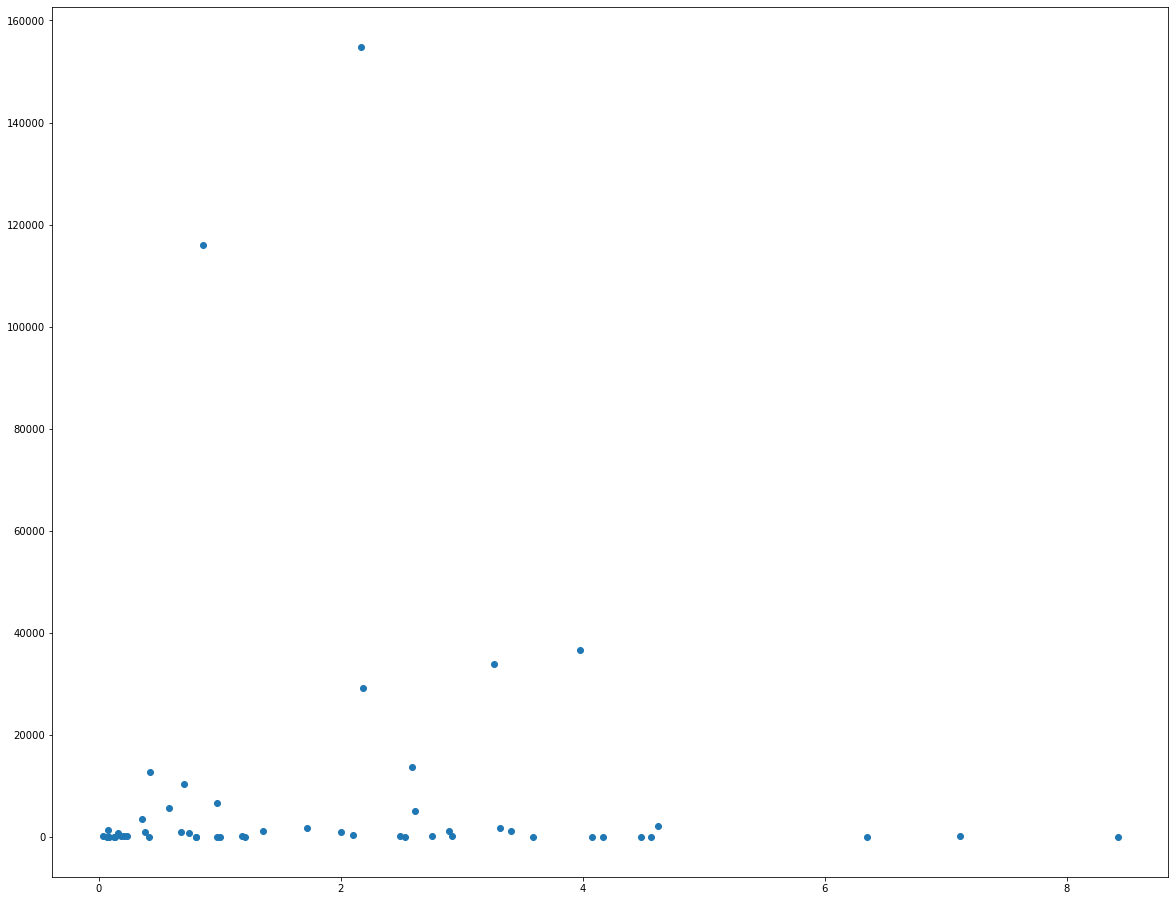

In [357]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,16
plt.scatter(covidandwb['DrsPer1k'], covidandwb['TotalDeaths'])
plt.show()